In [1]:
import json
from collections import defaultdict

import networkx as nx
import matplotlib
import matplotlib.pyplot as plt

In [16]:
with open('location_counts.json') as f:
    locations = json.load(f)

In [17]:
play = locations['rus']['chekhov-vishnevyi-sad']['locations']
english_locs = {
    'Париж': 'Paris',
    'Ментона': 'Menton',
    'Ярославль': 'Yaroslavl',
    'Киев': 'Kyiv',
    'Москва': 'Moscow',
    'Харьков': 'Kharkiv',
    'Россия': 'Russia',
    'Яшнево': 'Yashnevo',
    'Волга': 'Volga',
}

In [18]:
edges = []
edge_weights = []
vertex_types = {}

for speaker, locs in play.items():
    vertex_types[speaker] = 'speaker'
    for loc, count in locs.items():
        loc = english_locs[loc]
        edges.append((speaker, loc))
        edge_weights.append(count)
        vertex_types[loc] = 'loc'

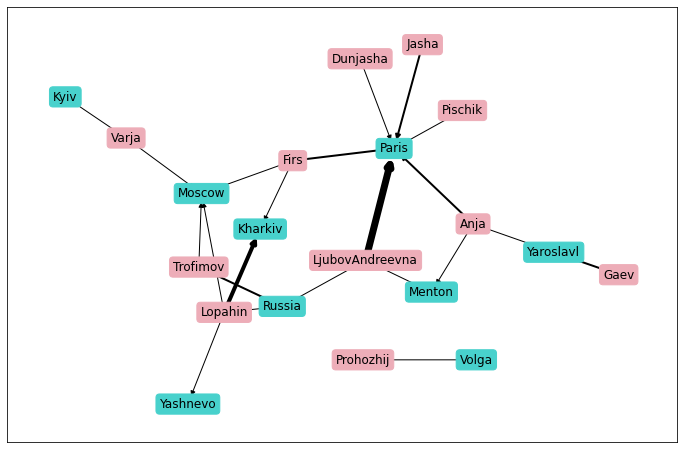

In [19]:
G = nx.DiGraph()
G.add_edges_from(edges)

speakers_plot = plt.figure(3, figsize=(12,8)) 
pos = nx.nx_agraph.graphviz_layout(G, prog='sfdp')
nx.draw_networkx_labels(
    G, pos, labels={n: n for n in G if vertex_types[n] == 'speaker'},
    bbox=dict(color="#edadb8", boxstyle='round,pad=0.3')
)
nx.draw_networkx_labels(
    G, pos, labels={n: n for n in G if vertex_types[n] == 'loc'},
    bbox=dict(color="#48d1cc", boxstyle='round,pad=0.3')
)
nx.draw_networkx_edges(G, pos, width=edge_weights)
plt.show()

speakers_plot.savefig("speakers.svg", format="svg", pad_inches=-0.1,bbox_inches='tight')

In [20]:
spanish_plays = locations['span']

In [21]:
edges = []
edge_weights = []
vertex_types = {}

for playname, info in spanish_plays.items():
    speakers = info['locations']
    play_counts = defaultdict(int)
    vertex_types[playname] = 'play'

    for speaker, sp_locations in speakers.items():
        for location, n in sp_locations.items():
            vertex_types[location] = 'loc'
            play_counts[location] += n

    for location, n in play_counts.items():
        if n > 1:
            edges.append((playname, location))
            edge_weights.append(min(5, n // 2))

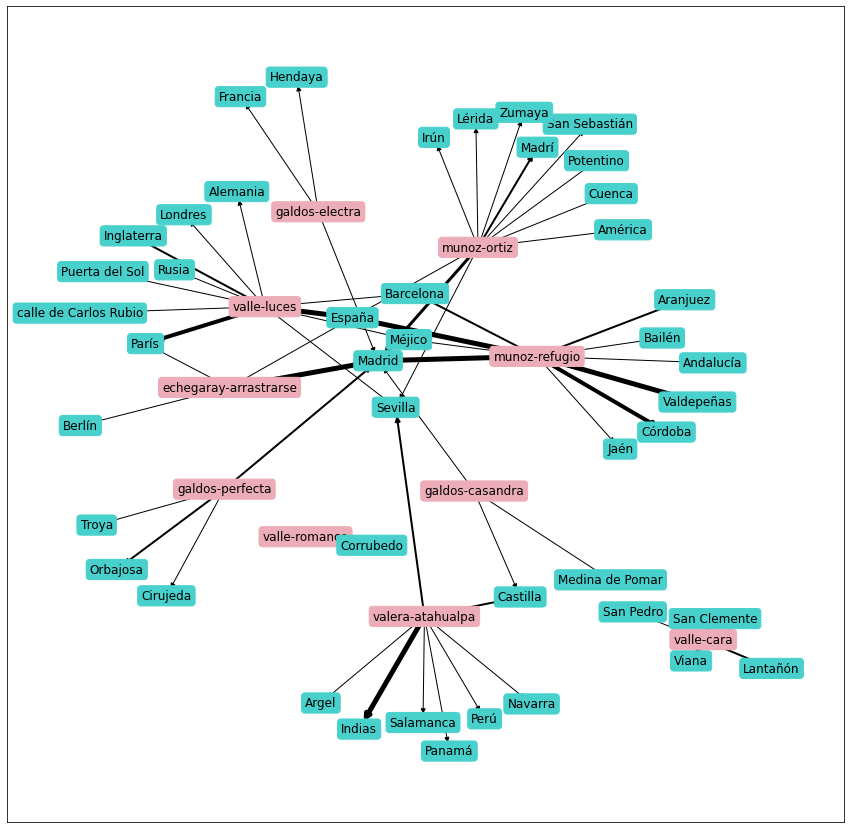

In [23]:
G = nx.DiGraph()
G.add_edges_from(edges)

plays_plot = plt.figure(3, figsize=(15,15)) 
pos = nx.nx_agraph.graphviz_layout(G, prog='fdp')
nx.draw_networkx_labels(
    G, pos, labels={n: n for n in G if vertex_types[n] == 'play'},
    bbox=dict(color="#edadb8", boxstyle='round,pad=0.3')
)
nx.draw_networkx_labels(
    G, pos, labels={n: n for n in G if vertex_types[n] == 'loc'},
    bbox=dict(color="#48d1cc", boxstyle='round,pad=0.3')
)
nx.draw_networkx_edges(G, pos, width=edge_weights)
plt.show()

plays_plot.savefig("plays.svg", format="svg", pad_inches=-0.1,bbox_inches='tight')